In [1]:
import pandas as pd
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb

# Load the CSV file
df = pd.read_csv('C:/Users/HP/Desktop/dataset_labels.csv')

# Function to load and preprocess images
def load_and_preprocess_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (64, 64))  # Resize image to 64x64
    img = img.astype('float32') / 255.0  # Normalize pixel values
    return img.flatten()  # Flatten the image to 1D array

# Load and preprocess all images
X = np.array([load_and_preprocess_image(path) for path in df['image_path']])
y = df['label']

# Encode labels to integers 
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [2]:
# Initialize the XGBoost classifier
xgb_clf = xgb.XGBClassifier(
    objective='multi:softmax',
    num_class=5,
    eval_metric='mlogloss',
    use_label_encoder=False
)

In [3]:
# Train the classifier
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_class=5, num_parallel_tree=None, ...)

In [4]:
from sklearn.metrics import accuracy_score

# Predict on the validation set
y_pred = xgb_clf.predict(X_val)

# Calculate accuracy
accuracy = accuracy_score(y_val, y_pred)
print(f'Validation Accuracy: {accuracy * 100:.2f}%')

Validation Accuracy: 74.11%


In [5]:
accuracy = accuracy_score(y_val, y_pred)
print(f'Validation Accuracy: {accuracy * 100:.2f}%')

Validation Accuracy: 74.11%


In [6]:
import matplotlib.pyplot as plt

In [7]:
# Function to display image
def display_image(image_array):
    img = image_array.reshape(64, 64, 3)  # Reshape to original dimensions
    plt.imshow(img)
    plt.axis('off')
    plt.show()

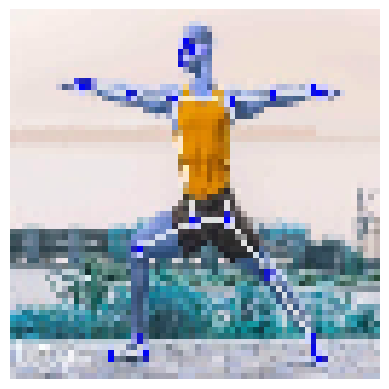

Actual: warrior2, Predicted: Goddess


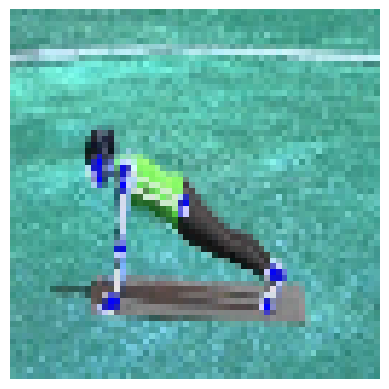

Actual: Plank, Predicted: Downdog


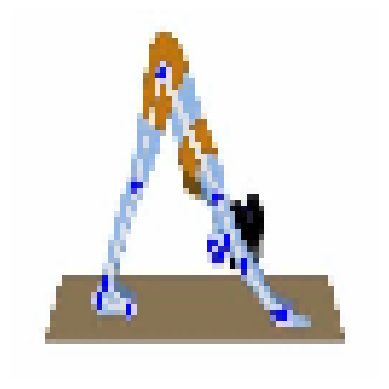

Actual: Downdog, Predicted: Downdog


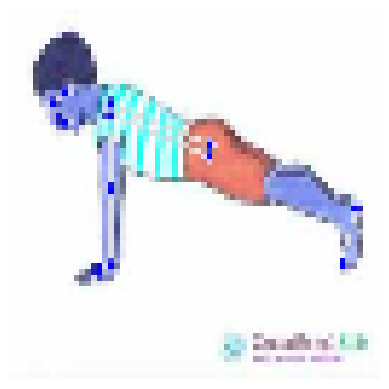

Actual: Plank, Predicted: Downdog


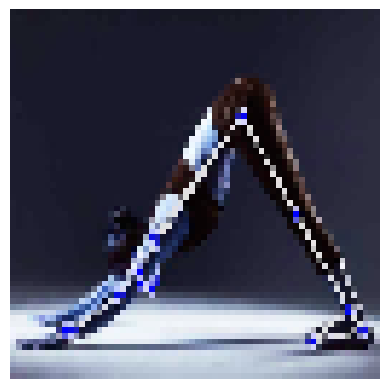

Actual: Downdog, Predicted: Downdog


In [8]:
num_samples = 5
for i in range(num_samples):
    display_image(X_val[i])
    print(f'Actual: {label_encoder.inverse_transform([y_val[i]])[0]}, Predicted: {label_encoder.inverse_transform([y_pred[i]])[0]}')

In [9]:
def classify_new_image(image_path, clf, label_encoder):
    # Load and preprocess the new image
    new_image = load_and_preprocess_image(image_path)
    new_image = np.expand_dims(new_image, axis=0)  # Add batch dimension
    
    # Predict the class of the new image
    predicted_class = clf.predict(new_image)
    
    # Convert the predicted class to the original label
    predicted_label = label_encoder.inverse_transform(predicted_class)
    return predicted_label[0]

In [10]:
# Example usage: classify a new image
new_image_path = 'C:/Users/HP/Desktop/test_5.jpg'
predicted_pose = classify_new_image(new_image_path, xgb_clf, label_encoder)
print(f'The predicted pose for the given image is: {predicted_pose}')

The predicted pose for the given image is: Goddess


In [11]:
import pickle

# Save the trained XGBoost model
with open('classification_xgb_model.pkl', 'wb') as f:
    pickle.dump(xgb_clf, f)